This Jupyter Notebook demonstrate building a Decision Tree Classifier on the Iris dataset using scikit-learn. The notebook covers the following steps:
1. Load the Iris dataset
2. Split the dataset into training and test sets
3. Train a Decision Tree Classifier on the training data
4. Visualize the decision tree
5. Evaluate the accuracy of the model on training set and the test set
6. Display the decision boundary of the classifier

In [21]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

# Load the iris dataset as a pandas dataframe
iris = load_iris(as_frame=True)

# Create a dataframe from the iris dataset and display the first few rows
iris_df = iris.frame
# The `feature_columns` variable is set to the first two columns of the DataFrame, 
# which represent the sepal length and sepal width.
feature_columns = iris_df.columns[:2]

# The `target_column` is set to "species", which is what we will be predicting.
target_column = "species"
iris_df[target_column] = iris.target_names[iris.target]

print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


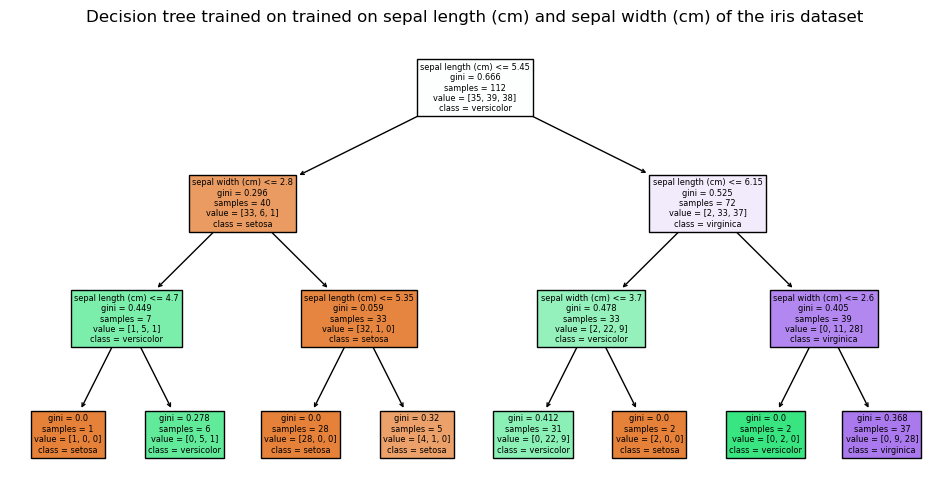

Train data accuracy: 0.8214285714285714
Test data accuracy: 0.7631578947368421


In [22]:
# Select columns for the feature matrix and the target vector
X, y = iris_df[feature_columns], iris_df["target"]

# Split the data into training and test sets
# The training set is used to train the model, and the test set is used to evaluate its performance.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.25)

# Train a Decision Tree Classifier
# Parameter is set to "gini", which means the model will use the Gini impurity to measure 
# the quality of a split. The max_depth of the tree is set to 3
dt_classifier = DecisionTreeClassifier(criterion="gini", max_depth=3)

# fit method is used to train the Decision Tree Classifier on the training data
dt_classifier.fit(X_train,y_train)

# Visualize the trained decision tree
plt.figure(figsize=(12,6))
plot_tree(dt_classifier, filled=True, feature_names=feature_columns, class_names=iris.target_names)
plt.title(f"Decision tree trained on trained on {feature_columns[0]} and {feature_columns[1]} of the iris dataset")
plt.show()

# Predict the test data
y_pred = dt_classifier.predict(X_test)

# Calculate the accuracy of the model
# The accuracy_score function is used to calculate the accuracy of the model, 
# which is the proportion of correct predictions
print("Train data accuracy:", accuracy_score(y_true = y_train, y_pred=dt_classifier.predict(X_train)))
print("Test data accuracy:", accuracy_score(y_true = y_test, y_pred=y_pred))

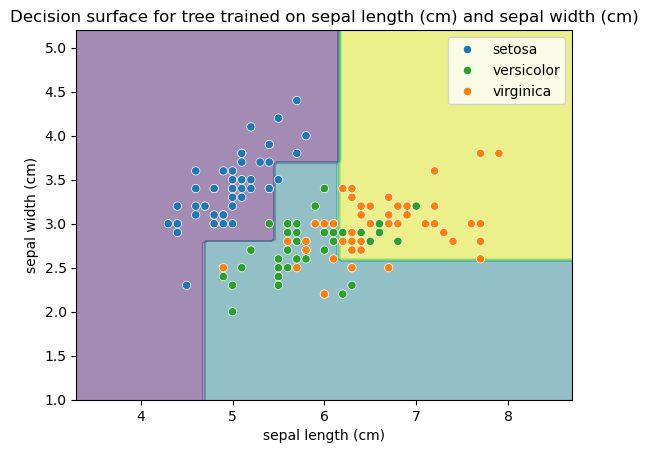

In [25]:
# Plot the decision boundary
#  The decision boundary is the hypersurface that the model uses to classify the data
DecisionBoundaryDisplay.from_estimator(
    dt_classifier, X_train, response_method="predict",
    xlabel=feature_columns[0], ylabel=feature_columns[1],
    alpha=0.5,
)

# Plot scatter plot of the data
palette = ["tab:blue", "tab:green", "tab:orange"]
ax = sns.scatterplot(
    data=iris_df,
    x=feature_columns[0],
    y=feature_columns[1],
    hue=target_column,
    palette=palette)

plt.legend(loc='best')
plt.title(f"Decision surface for tree trained on {feature_columns[0]} and {feature_columns[1]}")
plt.show()